In [1]:
import numpy as np
import pandas as pd
from nltk import word_tokenize
from string import punctuation
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

from xgboost import XGBClassifier



import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler

import random
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Read preprocessed data

In [2]:
df = pd.read_csv("dataset_imdb_preprocessed.csv",index_col=0)
df

,sentiment,lemmatized_review
0,1,one reviewer ha mentioned watching 1 oz episod...
1,1,wonderful little production filming technique ...
2,1,thought wa wonderful way spend time hot summer...
3,0,basically family little boy jake think zombie ...
4,1,petter mattei love time money visually stunnin...
...,...,...
49995,1,thought movie right good job wa creative origi...
49996,0,bad plot bad dialogue bad acting idiotic direc...
49997,0,catholic taught parochial elementary school nu...
49998,0,going disagree previous comment side maltin on...


# XGBoost using n_grams

In [4]:
df = pd.read_csv("dataset_imdb_preprocessed.csv",index_col=0)

x_train, x_test, y_train, y_test = train_test_split(df['lemmatized_review'], df['sentiment'], test_size=0.2, random_state=seed)
    
    
    
#vectorizer = CountVectorizer()#
vectorizer = CountVectorizer(ngram_range=(1, 2))#87
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
    
    
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
    
print(classification_report(y_test,y_pred))


Precision: 0.85
Recall: 0.88
F1 Score: 0.86
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



             Weight
count  2.425303e+06
mean   4.123197e-07
std    3.684559e-05
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.962543e-02


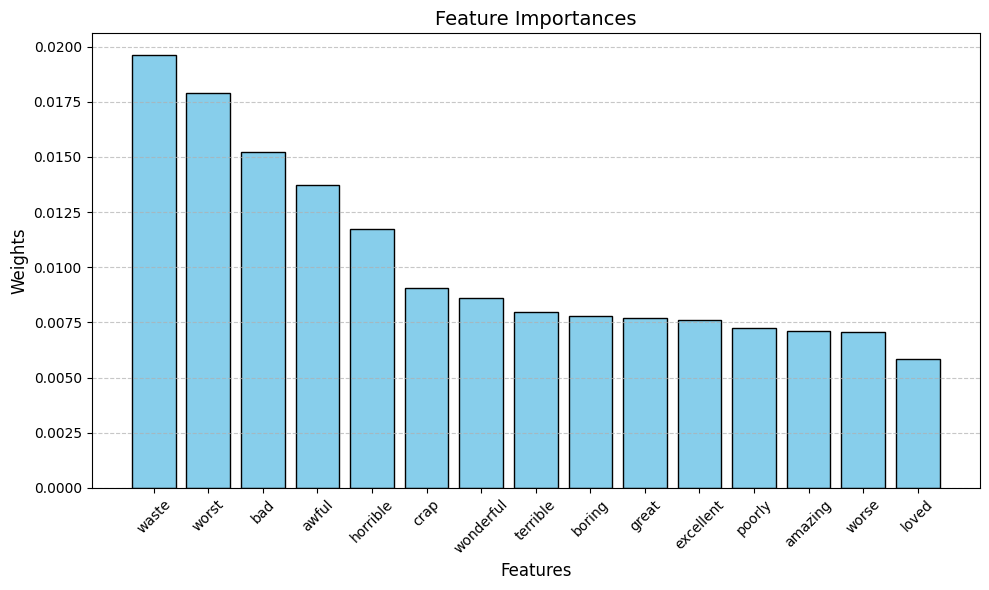

In [5]:
weights = model.feature_importances_
features = vectorizer.get_feature_names_out()

weight = pd.DataFrame({'Feature': features, 'Weight': weights})
print(weight.describe())
weight_df = weight[weight['Weight'] >3.903461e-04]
weight_df = weight_df.sort_values(by='Weight', ascending=False)
weight_df = weight_df.head(15)

plt.figure(figsize=(10, 6))
plt.bar(weight_df['Feature'], weight_df['Weight'], color='skyblue', edgecolor='black')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


# XGBoost using TF-IDF

In [6]:
df = pd.read_csv("dataset_imdb_preprocessed.csv",index_col=0)

x_train, x_test, y_train, y_test = train_test_split(df['lemmatized_review'], df['sentiment'], test_size=0.2, random_state=seed)
    
    

#vectorizer = TfidfVectorizer()#86
vectorizer = TfidfVectorizer(ngram_range=(1, 2))#89

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
    
    
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
    
print(classification_report(y_test,y_pred))


Precision: 0.85
Recall: 0.87
F1 Score: 0.86
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

